In [1]:
# Import dependencies
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
# Establish database connection
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [4]:
# reflect the existing database
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['Measurement', 'Stations']

In [6]:
# Save References to each tables
Measurements = Base.classes.Measurement
Station = Base.classes.Stations

In [7]:
# Create session link to the database
session = Session(engine)

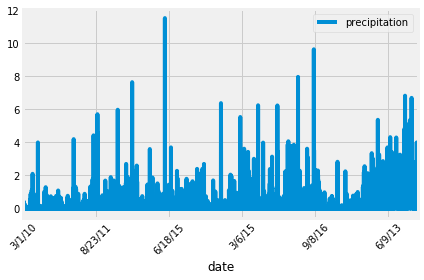

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
prev_year = dt.date.today() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

#Sort the dataframe by date
df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.xticks(rotation='45')
plt.tight_layout()

In [26]:
df.describe()

,prcp
count,5519.000000
mean,0.173354
std,0.503901
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,8.810000


In [27]:
#Design a query to calculate the total number of stations
session.query(func.count(Station.station)).all()

[(9)]

In [28]:
#Design a query to find the most active stations
session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [33]:
#Find the highest, lowest, and average temperature of the station which is the most active
session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
              filter(Measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

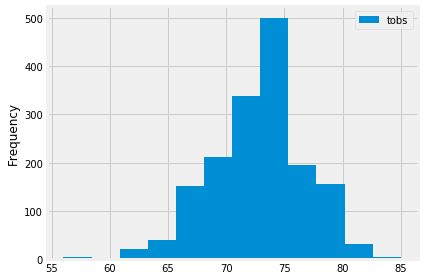

In [37]:
#Design a query to retrieve the last 12 months of temperature observation data

from pandas.plotting import table

prev_year = dt.date.today() - dt.timedelta(days=365)
results = session.query(Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    filter(Measurements.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [45]:
#Design a query that will accept a start date and end date, and return a minimum, average and maximum for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps('01-01-2015', '12-31-2015'))

[(54.0, 72.19625535754568, 86.0)]


In [47]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps('01-01-2014', '12-31-2014'))

[(54.0, 72.19625535754568, 86.0)]
